In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exploration and Visualization of MPG Data

In [2]:
data = pd.read_csv("mpg.csv")

In [3]:
data.head(n=7) #first 7 lines

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [6]:
data.dtypes   # data types

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [7]:
#here we see the horsepower being object but we know that it contains numerc values lets inspect

In [8]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
data["horsepower"].mean()

TypeError: ignored

In [10]:
data = data[data.horsepower != "?"]

In [11]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [12]:
data.horsepower = data.horsepower.astype("float")      #object type has been changed to float

In [13]:
data.dtypes    

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [14]:
data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [15]:
data.describe()     #to check the CMD and percentile

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
from sklearn.model_selection import train_test_split
df=data

In [19]:
df["acceleration"]= (df["acceleration"] - df["acceleration"].min())/(df["acceleration"].max()- df["acceleration"].min())
df["origin"]= (df["origin"] - df["origin"].min())/(df["origin"].max()- df["origin"].min())
df["model_year"]= (df["model_year"] - df["model_year"].min())/(df["model_year"].max()- df["model_year"].min())
df["horsepower"]= (df["horsepower"] - df["horsepower"].min())/(df["horsepower"].max()- df["horsepower"].min())
df["displacement"]= (df["displacement"] - df["displacement"].min())/(df["displacement"].max()- df["displacement"].min())

In [20]:

#training_features = [ 'acceleration','origin','displacement','model_year','horsepower']
training_features = [ 'origin','displacement','model_year']
target = 'mpg'
X_train, X_test, Y_train, Y_test = train_test_split(df[training_features],
                                                    df[target],
                                                     test_size=0.11,  #0.1 to 0.2
                                                   random_state=88)  #random state 1 to 10000

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, criterion='mae',max_depth=5,min_samples_split=4,min_samples_leaf=3)


In [22]:
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
predicted=model.predict(X_test)
print("Mean squared error: %.2f"
              % mean_squared_error(Y_test, predicted))
print('R Square score: %.2f' % r2_score(Y_test, predicted))

Mean squared error: 4.91
R Square score: 0.89


In [24]:

# The coefficients
#print('Coefficients: \n', model.coef_)
#print('Intercept:\n',model.intercept_)


[Text(186.86511627906975, 199.32, 'X[1] <= 0.314\nmae = 6.236\nsamples = 217\nvalue = 23.95'),
 Text(91.4860465116279, 163.07999999999998, 'X[2] <= 0.792\nmae = 4.517\nsamples = 133\nvalue = 27.1'),
 Text(35.03720930232558, 126.83999999999999, 'X[1] <= 0.058\nmae = 3.23\nsamples = 86\nvalue = 26.0'),
 Text(15.572093023255814, 90.6, 'X[2] <= 0.625\nmae = 4.74\nsamples = 16\nvalue = 29.0'),
 Text(7.786046511627907, 54.359999999999985, 'mae = 3.667\nsamples = 13\nvalue = 29.0'),
 Text(23.35813953488372, 54.359999999999985, 'mae = 3.725\nsamples = 3\nvalue = 41.25'),
 Text(54.50232558139535, 90.6, 'X[1] <= 0.128\nmae = 2.623\nsamples = 70\nvalue = 26.0'),
 Text(38.93023255813954, 54.359999999999985, 'X[2] <= 0.542\nmae = 2.003\nsamples = 32\nvalue = 26.0'),
 Text(31.144186046511628, 18.119999999999976, 'mae = 1.065\nsamples = 25\nvalue = 26.0'),
 Text(46.71627906976744, 18.119999999999976, 'mae = 1.477\nsamples = 7\nvalue = 30.0'),
 Text(70.07441860465116, 54.359999999999985, 'X[2] <= 0.29

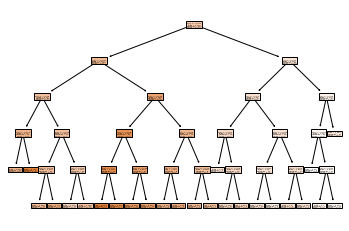

In [25]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[19],filled=True)